In [1]:
setwd('../../../')
source('.Rprofile')
setwd('case/sptatial_multi-omics/other_methods')

library(ggpubr)
library(tidyverse)

[1] "/rd2/user/xiacr/SLAT/renv/library/R-4.1/x86_64-pc-linux-gnu"         
[2] "/rd2/user/xiacr/SLAT/renv/sandbox/R-4.1/x86_64-pc-linux-gnu/a77553de"


Warning message in system2("poetry", c("env", "info", "--path"), stdout = TRUE):
“running command ''poetry' env info --path' had status 1”


python:         /rd2/user/xiacr/SLAT/conda/bin/python
libpython:      /rd2/user/xiacr/SLAT/conda/lib/libpython3.8.so
pythonhome:     /rd2/user/xiacr/SLAT/conda:/rd2/user/xiacr/SLAT/conda
version:        3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 06:04:18)  [GCC 10.3.0]
numpy:          /rd2/user/xiacr/SLAT/conda/lib/python3.8/site-packages/numpy
numpy_version:  1.23.3

NOTE: Python version was forced by use_python function
[1] "/rd2/user/xiacr/SLAT/conda/lib:/rd2/user/xiacr/SLAT/resource/R/lib/R/lib:/usr/local/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/java-11-openjdk-amd64/lib/server:/usr/local/cuda/lib64/rd2/user/xiacr/SLAT/conda/lib/:"


Loading required package: ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.0      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [7]:
# see quatify_analysis.ipynb for details
method <- c('SLAT', 'PASTE' , 'STAGATE', 'Harmony', 'Seurat', 'GLUE')
score <- c(0.444, NA, NA, 0.386, NA, 0.392)
df <- data.frame(method, score)
df

New names:
• `` -> `...1`
Rows: 3 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): method
dbl (4): ...1, joint_accuracy, celltype_accuracy, region_accuracy

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [19]:
result <- read_csv('./heterogenous_benchmark_results.csv')
result[nrow(result) + 1,] <- list(3, "PASTE",NA,NA,NA)
result[nrow(result) + 1,] <- list(4, "STAGATE",NA,NA,NA)
result[nrow(result) + 1,] <- list(5, "Seurat",NA,NA,NA)
result$method <- factor(result$method, levels = c('SLAT', 'PASTE' , 'STAGATE', 'Harmony', 'Seurat', 'GLUE'))
result

New names:
• `` -> `...1`
Rows: 3 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): method
dbl (4): ...1, joint_accuracy, celltype_accuracy, region_accuracy

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,method,joint_accuracy,celltype_accuracy,region_accuracy
<dbl>,<fct>,<dbl>,<dbl>,<dbl>
0,SLAT,0.4602096,0.5016675,0.7575036
1,GLUE,0.3995679,0.4764173,0.6422106
2,Harmony,0.3928509,0.4707003,0.6398285
3,PASTE,NA,NA,NA
4,STAGATE,NA,NA,NA
5,Seurat,NA,NA,NA


Warning message:
“Removed 3 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 3 rows containing missing values (`position_stack()`).”


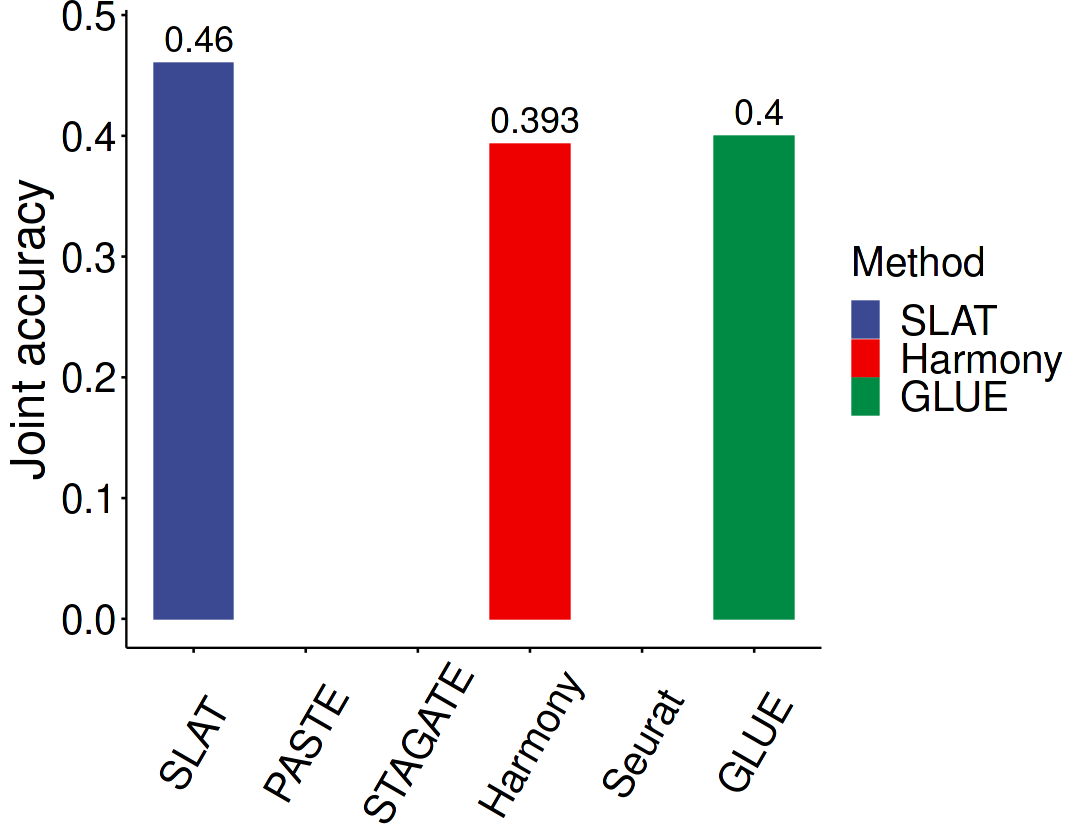

In [21]:
# plot the barplot
options(repr.plot.width=9, repr.plot.height=7)

ggbarplot(result, x='method', y='joint_accuracy',fill='method', color='method', palette='aaas', 
        xlab=F, ylab='Joint accuracy', legend.title='Method') %>%
ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=24, font.ytickslab=24, font.y=28) +
stat_summary(fun.data = function(x) data.frame(y = mean(x)+0.02, label = paste("", round(mean(x), 3))), geom="text", size=7.5) +
theme(axis.text.x=element_text(angle=60, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=28))